In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Load the dataset
file_path = r"C:\Users\bhara\Documents\Main flow internship\Task 5\TestReviews.csv"
df = pd.read_csv(file_path)

# Basic information about the dataset
df_info = df.info()
df_head = df.head()
df_class_counts = df['class'].value_counts()
df_nulls = df.isnull().sum()
df_duplicates = df.duplicated().sum()

(df_info, df_head, df_class_counts, df_nulls, df_duplicates)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4321 entries, 0 to 4320
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  4321 non-null   object
 1   class   4321 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 67.6+ KB


(None,
                                               review  class
 0  Fantastic spot for an even or a quite cocktail...      1
 1  Love, love, love the calamari. It's so good an...      1
 2  Love this place. Stiff martinis and cocktails,...      1
 3  It's everything a great cocktail bar should be...      1
 4  I came here before a pirates game, so it was a...      1,
 class
 1    2989
 0    1332
 Name: count, dtype: int64,
 review    0
 class     0
 dtype: int64,
 173)

In [ ]:
# Basic preprocessing function (lowercase, remove punctuation/numbers)
def simple_cleaning(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # keep only letters and spaces
    return text

# Apply basic cleaning
df['clean_review'] = df['review'].apply(simple_cleaning)

# Initialize TF-IDF vectorizer with English stopwords
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['clean_review'])

# Target labels
y = df['class']

X.shape, y.shape


((4321, 5000), (4321,))

In [8]:
# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, report, conf_matrix


(0.9271676300578034,
 {'0': {'precision': 0.9719101123595506,
   'recall': 0.7489177489177489,
   'f1-score': 0.8459657701711492,
   'support': 231.0},
  '1': {'precision': 0.9155749636098981,
   'recall': 0.9921135646687698,
   'f1-score': 0.9523088569265707,
   'support': 634.0},
  'accuracy': 0.9271676300578034,
  'macro avg': {'precision': 0.9437425379847244,
   'recall': 0.8705156567932593,
   'f1-score': 0.89913731354886,
   'support': 865.0},
  'weighted avg': {'precision': 0.930619379056337,
   'recall': 0.9271676300578034,
   'f1-score': 0.9239097204635622,
   'support': 865.0}},
 array([[173,  58],
        [  5, 629]], dtype=int64))

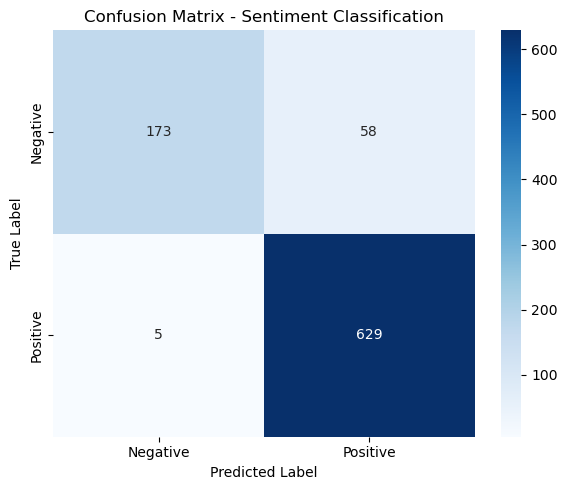

In [10]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Sentiment Classification")
plt.tight_layout()
plt.show()